In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LarsCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("cleaned_tweets.csv")
data.head(6)

,Unnamed: 0,user_name,likes,text,sport,followers,statuses_count,text_stemmed,text_lemmatized,text_string
0,0,StonyBrookWSOC,3,"['today', 'game', 'barbs', 'defense', 'game', ...",soccer,1178,2374,"['today', 'game', 'barb', 'defens', 'game', 'w...","['today', 'game', 'barb', 'defense', 'game', '...",today game barb defense game word
1,1,Amy Knapp,0,"['biggest', 'workout', 'today', 'putting', 'so...",soccer,2267,14601,"['biggest', 'workout', 'today', 'put', 'son', ...","['biggest', 'workout', 'today', 'putting', 'so...",biggest workout today putting son soccer ...
2,2,Lou Tobacco,0,"['winning', 'weekend', 'congratulations', 'aro...",soccer,328,84,"['win', 'weekend', 'congratul', 'around', 'lio...","['winning', 'weekend', 'congratulation', 'arou...",winning weekend congratulation around lion...
3,3,Parkside Rangers,0,"['extended', 'win', 'streak']",soccer,2158,9629,"['extend', 'win', 'streak']","['extended', 'win', 'streak']",extended win streak
4,4,ACU Sports,0,"['final', 'soccer', 'league', 'play', 'goal', ...",soccer,10272,23486,"['final', 'soccer', 'leagu', 'play', 'goal', '...","['final', 'soccer', 'league', 'play', 'goal', ...",final soccer league play goal second lef...
5,5,tnreels,5,"['mo', 'full', 'extension', 'layout', 'amp', '...",soccer,80,144,"['mo', 'full', 'extens', 'layout', 'amp', 'soc...","['mo', 'full', 'extension', 'layout', 'amp', '...",mo full extension layout amp soccer park


In [26]:
x = data[["followers", "statuses_count"]]
y = data["likes"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [28]:
#Linear regression implementation
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
r2 = r2_score(y_test, prediction)
#R2 score linear regression
r2

0.02464152286070509

In [29]:
#Lars regressor implementation
lars = LarsCV(cv=5).fit(x_train, y_train)
prediction_2 = lars.predict(x_test)
r2 = r2_score(y_test, prediction_2)
#R2 score lars regressor
r2

-0.00014646819645869336

In [30]:
#Support vector machine regressor implementation
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)
svr.fit(x_train, y_train)
prediction_3 = svr.predict(x_test)
r2 = r2_score(y_test, prediction_3)
#R2 score SVR
r2

-0.0051297354546255836

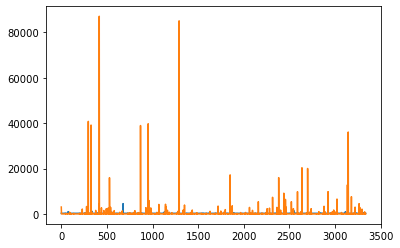

In [31]:
x = range(len(y_test))
#Y true vs linear regression prediction
plt.plot(x, prediction)
plt.plot(x, y_test)

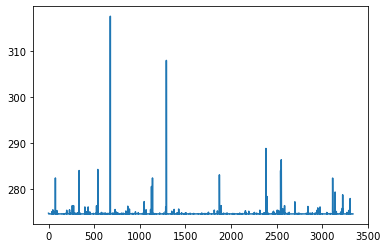

In [32]:
#Y true vs lars regressor prediction
plt.plot(x, prediction_2)

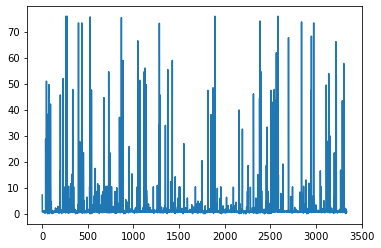

In [33]:
#Y true vs SVR prediction
plt.plot(x, prediction_3)